In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load dataset
df = pd.read_csv("collegiate_athlete_injury_dataset.csv")

# Show first 5 lines
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [21]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,100.000000,1.000000


In [22]:
# Data quality check
print(f"num of duplicates:", df.duplicated().sum())
df.isnull().sum()

num of duplicates: 0


Athlete_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Position                    0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
ACL_Risk_Score              0
Injury_Indicator            0
dtype: int64

In [23]:
# Unique values
print(f"unique values:\n", df.nunique(dropna=False))

unique values:
 Athlete_ID                  200
Age                           7
Gender                        2
Height_cm                    39
Weight_kg                    45
Position                      3
Training_Intensity            9
Training_Hours_Per_Week      15
Recovery_Days_Per_Week        3
Match_Count_Per_Week          4
Rest_Between_Events_Days      3
Fatigue_Score                 9
Performance_Score            49
Team_Contribution_Score      49
Load_Balance_Score           31
ACL_Risk_Score               73
Injury_Indicator              2
dtype: int64


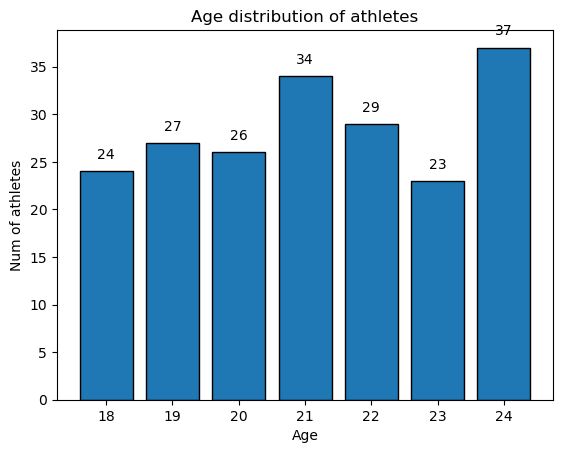

In [24]:
age_counts = df['Age'].value_counts().sort_index()

bars = plt.bar(age_counts.index, age_counts.values, edgecolor='black')

plt.title("Age distribution of athletes")
plt.xlabel("Age")
plt.ylabel("Num of athletes")
plt.xticks(age_counts.index)

for bar in bars:
    height = bar.get_height() 
    plt.text(
        bar.get_x() + bar.get_width()/2,  
        height + 1,                       
        str(height),                      
        ha='center', va='bottom'          
    )

plt.show()

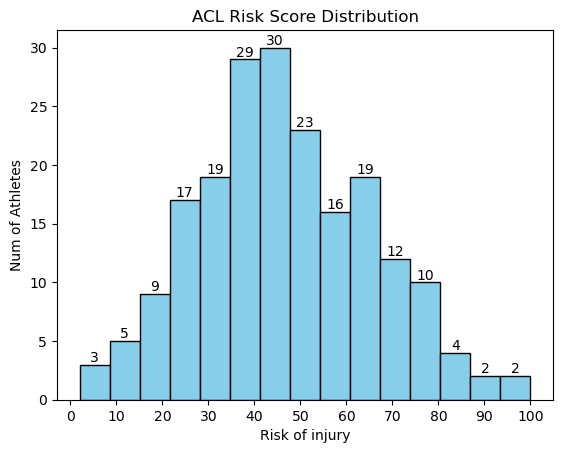

In [25]:
# ACL Risk Score
counts, bins, patches = plt.hist(
    df['ACL_Risk_Score'],
    bins=15,
    edgecolor='black',
    color='skyblue'
)

plt.title("ACL Risk Score Distribution")
plt.xlabel("Risk of injury")
plt.ylabel("Num of Athletes")
plt.xticks(np.arange(0, 101, 10))

for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text(
        (bin_left + bin_right) / 2,   
        count,                    
        str(int(count)),             
        ha='center', va='bottom'
    )

plt.show()

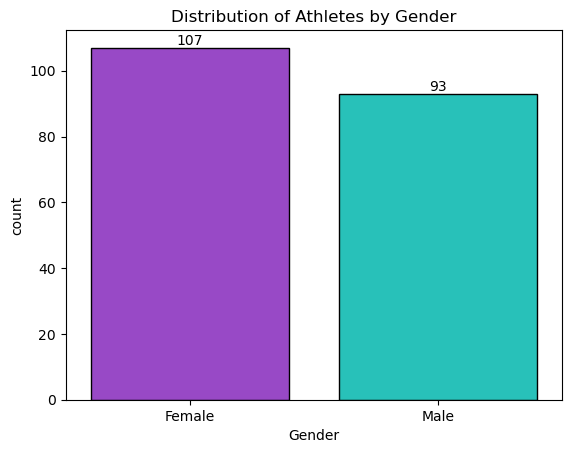

In [26]:
# Athletes by Gender
ax = sns.countplot(x='Gender', hue='Gender', data=df, palette=["#9e34db", "#0fdad0"], edgecolor="black", legend=False)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title("Distribution of Athletes by Gender")
plt.show()


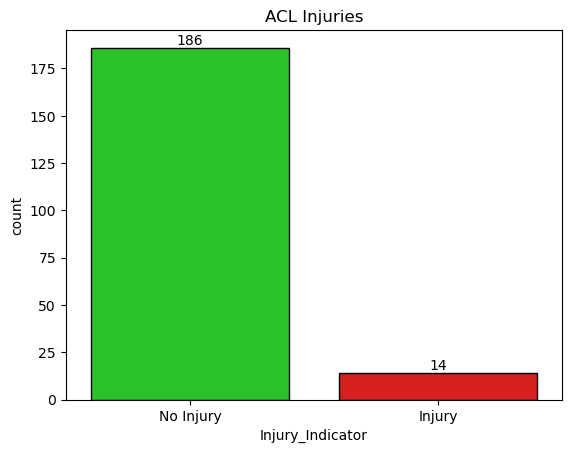

In [27]:
# ACL Injuries
ax = sns.countplot(x='Injury_Indicator', hue='Injury_Indicator', data=df, palette=["#12da0f", "#f50000"], edgecolor="black", legend=False)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title("ACL Injuries")
plt.xticks([0,1], ["No Injury", "Injury"])
plt.show()

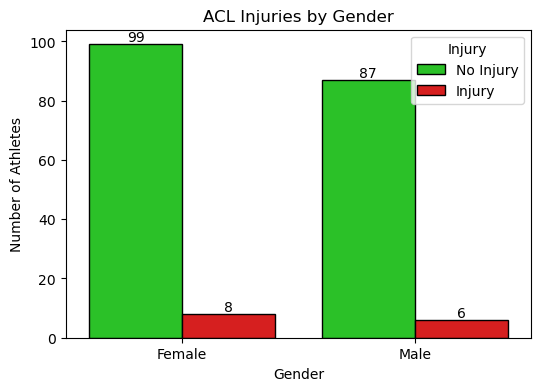

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(
    x='Gender',                     
    hue='Injury_Indicator',         
    data=df,
    palette=["#12da0f", "#f50000"], 
    edgecolor="black",
    legend=False
)

for p in ax.patches:
    ax.annotate(
        int(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom'
    )

plt.title("ACL Injuries by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Athletes")
plt.legend(title="Injury", labels=["No Injury", "Injury"])
plt.show()


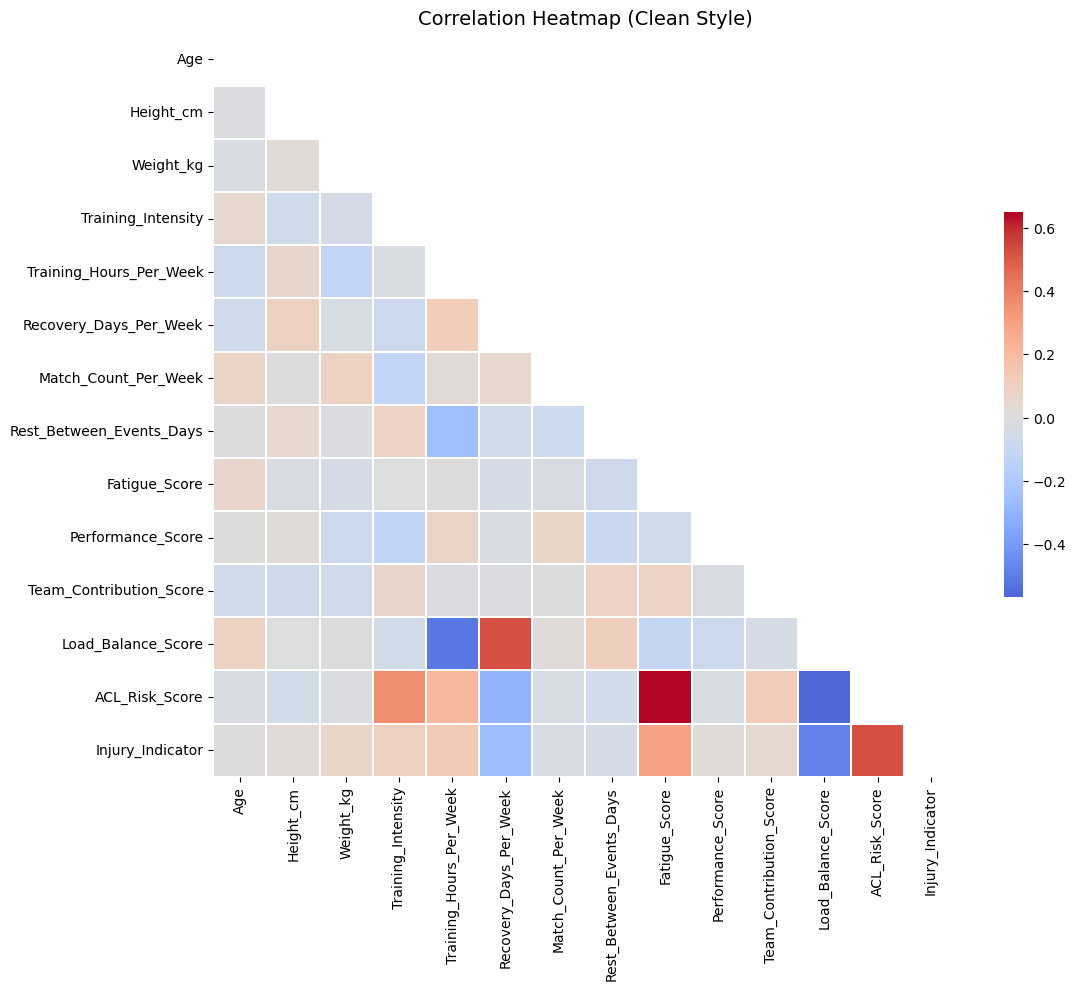

In [29]:
# Heatmap
# Fatigue Score = Subjective fatigue level of the athlete

df_numeric = df.select_dtypes(include=['number'])

corr = df_numeric.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,                
    cmap='coolwarm',          
    center=0,                 
    square=True,             
    linewidths=0.3,           
    cbar_kws={"shrink": 0.5},
    annot=False              
)

plt.title("Correlation Heatmap (Clean Style)", fontsize=14)
plt.show()


## 🔎 Key Insights from the Correlation Heatmap

- **Load_Balance_Score ↔ Rest_Between_Events_Days**  
  Strong positive correlation.  
  👉 More rest days between events are strongly associated with better load balance.

- **Load_Balance_Score ↔ ACL_Risk_Score**  
  Strong negative correlation.  
  👉 Better load balance significantly reduces the risk of ACL injuries.

- **ACL_Risk_Score ↔ Injury_Indicator**  
  Strong positive correlation.  
  👉 A higher ACL risk score is closely linked to actual injury occurrence.

- **Training_Hours_Per_Week ↔ Fatigue_Score**  
  Moderate positive correlation.  
  👉 More weekly training hours tend to increase athletes’ fatigue levels.

- **Performance_Score ↔ Fatigue_Score**  
  Moderate negative correlation.  
  👉 Higher fatigue levels are associated with lower performance scores.

---
📌 **Business takeaway:**  
The heatmap highlights the critical importance of balancing training load and recovery. Too much training without sufficient rest increases fatigue and ACL risk, which not only harms athlete health but also reduces team performance.


# Customer Segmentation Analysis

In [30]:
def risk_category(score):
    if score < 33:
        return "Low"
    elif score < 67:
        return "Medium"
    else:
        return "High"
    
df['Risk_Level'] = df['ACL_Risk_Score'].apply(risk_category)

counts = df.groupby(['Gender', 'Risk_Level']).size().reset_index(name='count')

counts['percent'] = counts.groupby('Gender')['count'].transform(lambda x: 100 * x / x.sum())


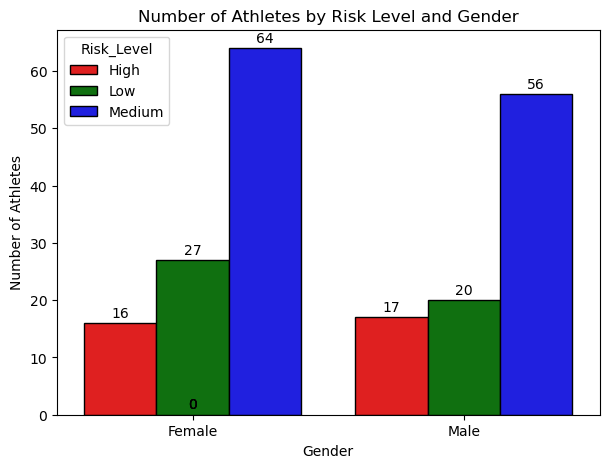

In [31]:
plt.figure(figsize=(7,5))
ax = sns.barplot(
    x='Gender', y='count', hue='Risk_Level', data=counts, palette=["red", "green", "blue"], edgecolor="black")

for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
        ha='center', va='bottom'
    )

plt.title("Number of Athletes by Risk Level and Gender")
plt.ylabel("Number of Athletes")
plt.show()

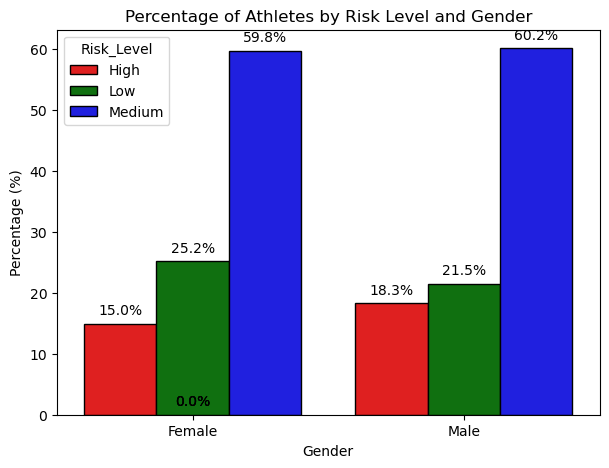

In [32]:
plt.figure(figsize=(7,5))
ax = sns.barplot(
    x='Gender', y='percent', hue='Risk_Level', data=counts, palette=["red", "green", "blue"], edgecolor="black")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2., p.get_height() + 1),
        ha='center', va='bottom'
    )

plt.title("Percentage of Athletes by Risk Level and Gender")
plt.ylabel("Percentage (%)")
plt.show()

In [33]:
pivot_counts = pd.pivot_table(
    df, 
    index='Gender', 
    columns='Risk_Level', 
    values='Athlete_ID', 
    aggfunc='count',
    margins=True,
    margins_name='Total'
)

risk_levels = ['Low', 'Medium', 'High']
pivot_percent = pivot_counts[risk_levels].div(pivot_counts[risk_levels].sum(axis=1), axis=0) * 100

pivot_combined = pivot_counts.copy()
for col in risk_levels:
    pivot_combined[col] = pivot_counts[col].astype(str) + " (" + pivot_percent[col].round(1).astype(str) + "%)"

styled_pivot = pivot_counts.style.set_caption("Athletes by Gender and Risk Level (Counts and %)")
styled_pivot = styled_pivot.background_gradient(cmap="YlGnBu", axis=None)
display(pivot_combined)
display(styled_pivot)

Risk_Level,High,Low,Medium,Total
Gender,,,,
Female,16 (15.0%),27 (25.2%),64 (59.8%),107
Male,17 (18.3%),20 (21.5%),56 (60.2%),93
Total,33 (16.5%),47 (23.5%),120 (60.0%),200


Risk_Level,High,Low,Medium,Total
Gender,,,,
Female,16,27,64,107
Male,17,20,56,93
Total,33,47,120,200


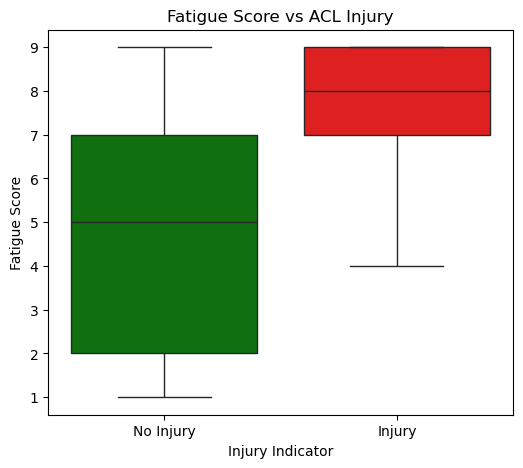

In [34]:
plt.figure(figsize=(6,5))
sns.boxplot(
    x='Injury_Indicator', 
    y='Fatigue_Score', 
    hue='Injury_Indicator', 
    data=df, 
    palette={0:"green", 1:"red"}, 
    legend=False
)
plt.xticks([0,1], ["No Injury", "Injury"])
plt.title("Fatigue Score vs ACL Injury")
plt.ylabel("Fatigue Score")
plt.xlabel("Injury Indicator")
plt.show()


## Fatigue Score vs ACL Injury

The analysis highlights a clear relationship between fatigue levels and ACL injuries:

Athletes who did not sustain an ACL injury show a wide distribution of fatigue scores, ranging from very low (1-2) to very high (8-9), with an average around 5.

Athletes who sustained an ACL injury exhibit consistently high fatigue scores, concentrated mostly in the range 7-9, with an average close to 8.

**This indicates that high fatigue levels are strongly associated with ACL injury risk.**

### Business Insight

Monitoring and managing fatigue levels is critical for injury prevention.
Athletes with persistently high fatigue scores should be flagged for load management interventions such as reduced training intensity, increased recovery days, or closer medical supervision.
This proactive approach could significantly lower injury rates while maintaining long-term athlete performance.

## 📊 EDA & Segmentation Summary

### 🔍 Data Quality

No duplicates or missing values.

All feature ranges are valid and realistic (Age 18-25, Training Hours 5-20, ACL Risk 0-100).

### 📈 Exploratory Data Analysis (EDA)

Age Distribution - Most athletes are between 20-24, fairly balanced.

Gender Balance - Almost equal distribution between male and female athletes.

ACL Risk Score - Majority are in the medium risk range, with a noticeable group in high risk.

Fatigue Score - Wide spread (1-10), but clearly higher in injured athletes.

Performance Score - Declines as fatigue levels increase.

Correlation Heatmap revealed:

More recovery days → better Load Balance.

Higher Load Balance → lower ACL Risk.

ACL Risk Score strongly correlates with actual ACL Injuries.

### 👥 Segmentation

By Gender and ACL Risk:

Female athletes show a slightly higher concentration in High Risk.

Male athletes are more concentrated in the Medium Risk group.

Fatigue vs Injury:

Injured athletes have consistently high fatigue levels (7-9).

Non-injured athletes show a wider distribution, with lower average fatigue (~5).

### 💡 Business Insights

Fatigue is a key driver of injuries - High fatigue strongly increases ACL injury risk.

Load Balance is critical - Better balance between training and recovery reduces injury risk.

Gender-specific differences - Female athletes appear more vulnerable in the high-risk group, suggesting tailored training/recovery strategies.

Actionable Recommendation - Implement daily monitoring of fatigue and load balance to identify high-risk athletes and adjust their training load proactively.

### 👉 This closes the EDA & Segmentation phase.

Next, we move to Predictive Modeling, where we will attempt to forecast ACL injuries using features such as Fatigue Score, ACL Risk Score, and Load Balance Score.